In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point
import numpy as np
import pandas as pd
import pickle
import networkx as nx

In [ ]:


# 读取small_scale_roads.shp文件
roads = gpd.read_file(f'data_for_test/meters_data/fix_roads.shp')

# 显示基本信息
print("=== 数据基本信息 ===")
print(f"数据形状: {roads.shape}")
print(f"坐标系: {roads.crs}")
print(f"字段列表: {list(roads.columns)}")
print(f"道路数量: {len(roads)}")

roads_sorted_by_highway = roads.sort_values('highway', ascending=False)
print("=== 按道路类型排序 ===")
print(roads_sorted_by_highway.head(10).to_string())
print(roads['highway'].unique())


primary_roads = roads.query("highway == 'primary'")
print(primary_roads.head(10).to_string())

=== 数据基本信息 ===
数据形状: (42370, 6)
坐标系: EPSG:32650
字段列表: ['source', 'pyname', 'length', 'width', 'highway', 'geometry']
道路数量: 42370
=== 按道路类型排序 ===
       source pyname length width highway                                                                                                                                                                                                                                                                                                                                                                          geometry
23782       2   None  0.011    30  street                                                                                                                                                                                                                                                                                                                       LINESTRING (672772.946 3553136.538, 672768.054 3553146.426)
23688       2   None  0.008    

# 根据等级可视化

d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12289 (\N{IDE

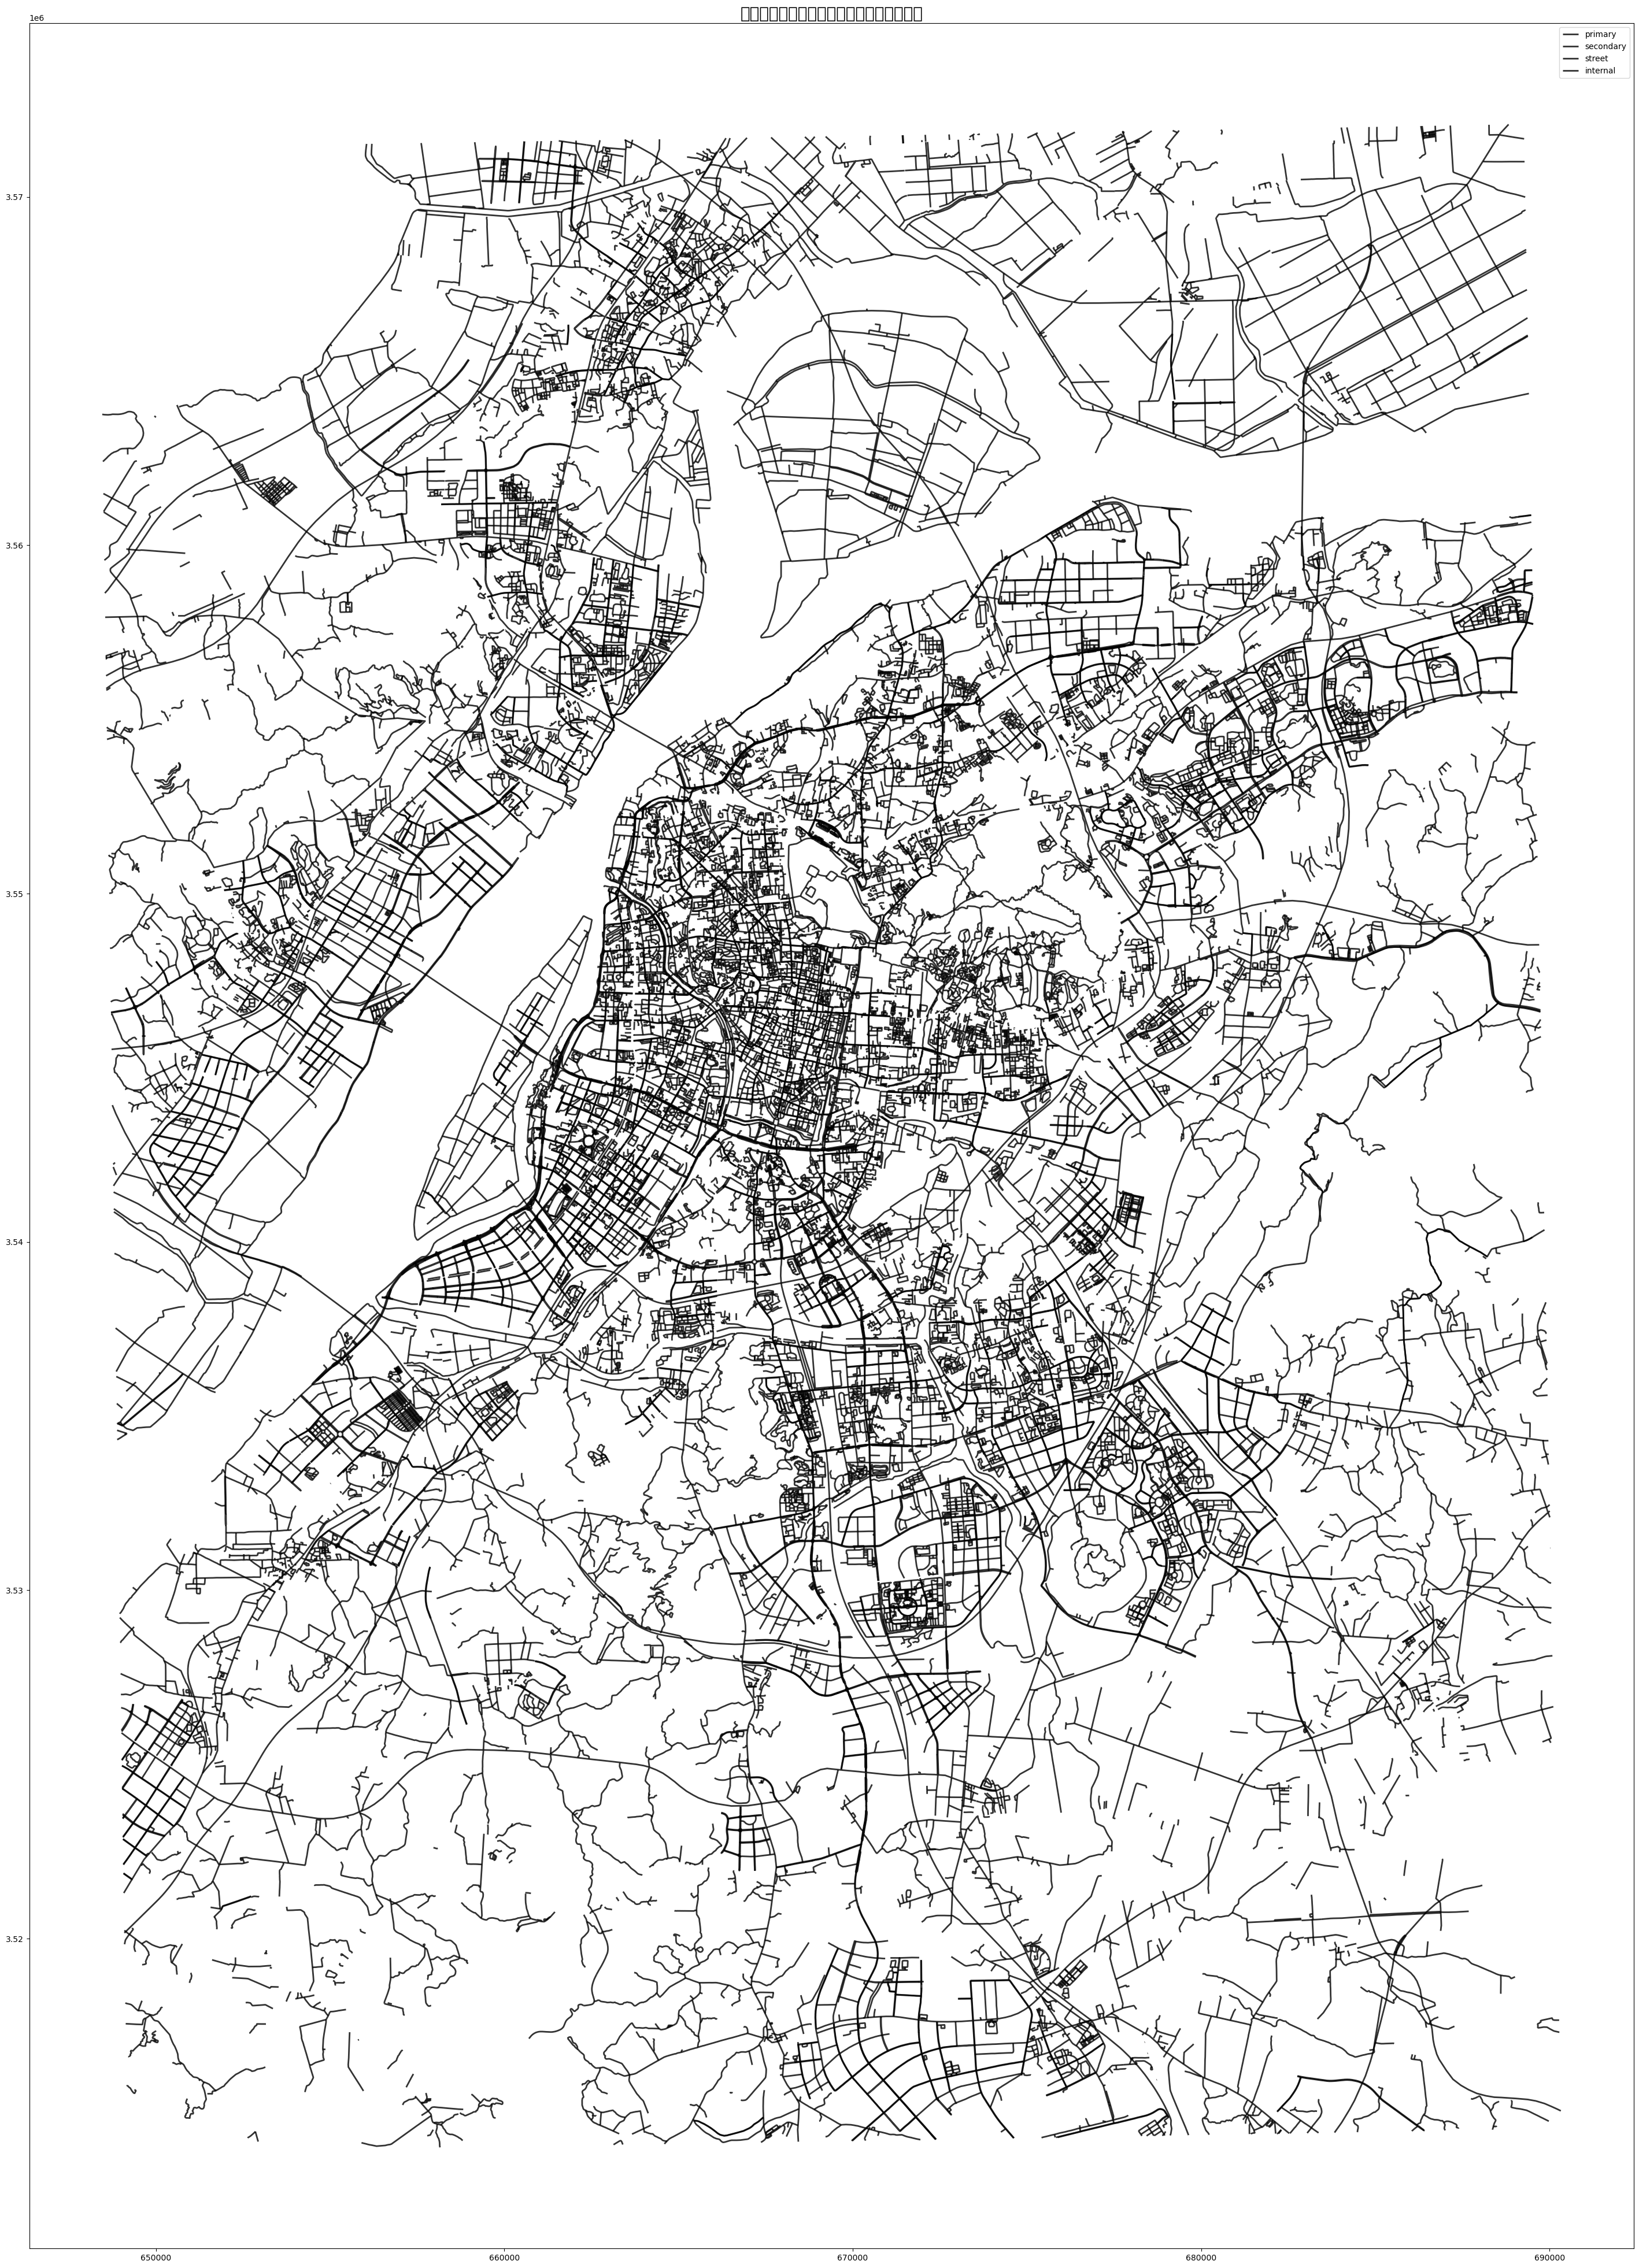

总道路数: 42370
有名称的道路: 8971
无名称的道路: 33399

按道路类型统计端点数:
primary: 1633 个端点
secondary: 14174 个端点
street: 7160 个端点
internal: 26801 个端点


In [ ]:


# 读取数据
roads = gpd.read_file('data_for_test/meters_data/fixed_roads.shp')

# 创建图形
fig, ax = plt.subplots(figsize=(100, 50))

# # 设置不同道路类型的颜色和线宽
# road_styles = {
#     'primary': {'color': 'red', 'linewidth': 5.0},
#     'secondary': {'color': 'orange', 'linewidth': 3.0},
#     'street': {'color': 'blue', 'linewidth': 2.0},
#     'internal': {'color': 'green', 'linewidth': 0.5}
# }
# 设置不同道路类型的颜色和线宽
road_styles = {
    'primary': {'color': 'black', 'linewidth': 2.0},
    'secondary': {'color': 'black', 'linewidth': 2.0},
    'street': {'color': 'black', 'linewidth': 2.0},
    'internal': {'color': 'black', 'linewidth': 2.0}
}

# 按道路类型分别绘制道路和端点
for highway_type in roads['highway'].unique():
    subset = roads[roads['highway'] == highway_type]
    style = road_styles[highway_type]
    
    # 绘制道路
    subset.plot(ax=ax, 
               color=style['color'], 
               linewidth=style['linewidth'], 
               label=f'{highway_type}', 
               alpha=0.8)
    
    # 提取该类型道路的端点
    endpoints = set()
    for idx, road in subset.iterrows():
        coords = list(road.geometry.coords)
        endpoints.add(coords[0])  # 起点
        endpoints.add(coords[-1])  # 终点
    
    # # 绘制端点
    # if endpoints:
    #     endpoint_x = [coord[0] for coord in endpoints]
    #     endpoint_y = [coord[1] for coord in endpoints]
        
    #     ax.scatter(endpoint_x, endpoint_y, 
    #               color=style['color'], 
    #               s=5,  # 点的大小
    #               alpha=0.7,
    #               linewidth=0.5,
    #               zorder=5)

# # 添加道路名称标签（只显示有名称的道路）
# for idx, road in roads.iterrows():
#     if pd.notna(road['pyname']):  # 只显示有名称的道路
#         # 计算道路中心点
#         coords = list(road.geometry.coords)
#         center_x = np.mean([coord[0] for coord in coords])
#         center_y = np.mean([coord[1] for coord in coords])
        
#         # 根据道路类型设置文字颜色
#         highway_type = road['highway']
#         text_color = road_styles[highway_type]['color']
        
#         # 添加文字标签
#         ax.text(center_x, center_y, road['pyname'], 
#                fontsize=8, 
#                color=text_color,
#                weight='bold',
#                ha='center', va='center',
#                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

plt.title('道路网络、道路名称与端点（按类型着色）', fontsize=20)
plt.legend()
plt.show()

# 统计信息
named_roads = roads[roads['pyname'].notna()]
print(f"总道路数: {len(roads)}")
print(f"有名称的道路: {len(named_roads)}")
print(f"无名称的道路: {len(roads) - len(named_roads)}")

# 按道路类型统计端点数
print(f"\n按道路类型统计端点数:")
for highway_type in roads['highway'].unique():
    subset = roads[roads['highway'] == highway_type]
    endpoints = set()
    for idx, road in subset.iterrows():
        coords = list(road.geometry.coords)
        endpoints.add(coords[0])
        endpoints.add(coords[-1])
    print(f"{highway_type}: {len(endpoints)} 个端点")

# 构建基础图

In [ ]:

def safe_attr(row, key, default=None):
    return row[key] if key in row and row[key] is not None else default

def pick_intersection_point(g):
    if g is None or g.is_empty: return None
    gt = g.geom_type
    if gt == "Point": return g
    if gt == "MultiPoint": return list(g.geoms)[0]
    if gt in ("LineString", "MultiLineString", "Polygon", "MultiPolygon"):
        return g.representative_point()
    for sub in getattr(g, "geoms", []):
        p = pick_intersection_point(sub)
        if p is not None: return p
    return None

def neighbors_by_intersection(gdf, geom):
    cand_idx = list(gdf.sindex.intersection(geom.bounds))
    if not cand_idx: return set()
    cand = gdf.iloc[cand_idx]
    return set(cand[cand.intersects(geom)]["rid"].tolist())

def build_route_graphs(shp_path, crs_metric="EPSG:32650"):
    roads = gpd.read_file(shp_path)
    if roads.crs is None: roads = roads.set_crs(4326)
    roads = roads.to_crs(crs_metric).copy()
    roads = roads[roads.geometry.notnull()].reset_index(drop=True)
    roads["rid"] = np.arange(len(roads))

    # 修改筛选逻辑：只筛选中心道路为highway='street'，周边道路不受限制
    if "highway" in roads.columns and "length" in roads.columns:
        center_roads = roads[(roads["highway"] == "street") & (roads["length"] > 30) & (roads["length"] < 500)].copy()
    elif "highway" in roads.columns:
        center_roads = roads[roads["highway"] == "street"].copy()
    elif "length" in roads.columns:
        center_roads = roads[(roads["length"] > 30) & (roads["length"] < 500)].copy()
    else:
        center_roads = roads.copy()
    
    if center_roads.empty: raise ValueError("没有满足条件的中心道路。")

    _ = roads.sindex  # 使用完整的roads数据作为邻居搜索
    route_graphs = []

    for _, center in center_roads.iterrows():  # 只遍历筛选出的中心道路
        G = nx.Graph()
        c_id = int(center["rid"])

        # 中心节点（仅9个属性 + geometry）
        G.add_node(
            c_id,
            geometry=center.geometry,
            length=safe_attr(center, "length", 0.0),
            width=safe_attr(center, "width", 0.0),
            highway=safe_attr(center, "highway", "unknown"),
            height_mean=safe_attr(center, "height_mean", 0.0),
            frontage_L_mean=safe_attr(center, "frontage_L_mean", 0.0),
            public_den=safe_attr(center, "public_den", 0.0),
            transport_den=safe_attr(center, "transport_den", 0.0),
            nvdi_mean=safe_attr(center, "nvdi_mean", 0.0),
            hop_level=0,
            is_center=True
        )

        # 0-hop：与中心相交的道路（从完整的roads数据中搜索，不受highway限制）
        nbr0 = neighbors_by_intersection(roads, center.geometry)
        nbr0.discard(c_id)

        for rid in nbr0:
            row = roads.loc[roads["rid"] == rid].iloc[0]
            if rid not in G:
                G.add_node(
                    rid,
                    geometry=row.geometry,
                    length=safe_attr(row, "length", 0.0),
                    width=safe_attr(row, "width", 0.0),
                    highway=safe_attr(row, "highway", "unknown"),
                    height_mean=safe_attr(row, "height_mean", 0.0),
                    frontage_L_mean=safe_attr(row, "frontage_L_mean", 0.0),
                    public_den=safe_attr(row, "public_den", 0.0),
                    transport_den=safe_attr(row, "transport_den", 0.0),
                    nvdi_mean=safe_attr(row, "nvdi_mean", 0.0),
                    hop_level=0,
                    is_center=False
                )
            inter = pick_intersection_point(center.geometry.intersection(row.geometry))
            G.add_edge(c_id, rid, intersection_coords=None if inter is None else (inter.x, inter.y))

        # 1-hop：0-hop 之间 + 0-hop 与其它相交者
        for rid0 in nbr0:
            geom0 = roads.loc[roads["rid"] == rid0].iloc[0].geometry

            # 0-hop 之间（去重）
            nbr0b = neighbors_by_intersection(roads, geom0) & nbr0
            for rid1 in nbr0b:
                if rid1 <= rid0: continue
                inter = pick_intersection_point(geom0.intersection(roads.loc[roads["rid"] == rid1].iloc[0].geometry))
                G.add_edge(rid0, rid1, intersection_coords=None if inter is None else (inter.x, inter.y))

            # 0-hop 与其它
            nbr1 = neighbors_by_intersection(roads, geom0)
            nbr1.discard(c_id)
            nbr1 -= nbr0
            for ridx in nbr1:
                rowx = roads.loc[roads["rid"] == ridx].iloc[0]
                if ridx not in G:
                    G.add_node(
                        ridx,
                        geometry=rowx.geometry,
                        length=safe_attr(rowx, "length", 0.0),
                        width=safe_attr(rowx, "width", 0.0),
                        highway=safe_attr(rowx, "highway", "unknown"),
                        height_mean=safe_attr(rowx, "height_mean", 0.0),
                        frontage_L_mean=safe_attr(rowx, "frontage_L_mean", 0.0),
                        public_den=safe_attr(rowx, "public_den", 0.0),
                        transport_den=safe_attr(rowx, "transport_den", 0.0),
                        nvdi_mean=safe_attr(rowx, "nvdi_mean", 0.0),
                        hop_level=1,
                        is_center=False
                    )
                inter = pick_intersection_point(geom0.intersection(rowx.geometry))
                G.add_edge(rid0, ridx, intersection_coords=None if inter is None else (inter.x, inter.y))

        route_graphs.append({
            "graph": G,
            "center_id": c_id
        })

    print(f"生成的 route_graph 数量: {len(route_graphs)}")
    return route_graphs

def save_route_graphs(route_graphs, output_path="models/data/route_graphs_origin.pkl"):
    with open(output_path, "wb") as f:
        pickle.dump(route_graphs, f)
    print(f"已保存到: {output_path}")

if __name__ == "__main__":
    graphs = build_route_graphs("data_for_test/Street.geojson", crs_metric="EPSG:32650")
    save_route_graphs(graphs)

生成的 route_graph 数量: 2161
已保存到: models/data/route_graphs.pkl


In [4]:


road_styles = {
    'primary':   {'color': 'red',    'linewidth': 5.0},
    'secondary': {'color': 'orange', 'linewidth': 3.0},
    'street':    {'color': 'blue',   'linewidth': 2.0},
    'internal':  {'color': 'green',  'linewidth': 1.0},
    'default':   {'color': 'grey',  'linewidth': 0.5}
}

def style_of(attrs):
    """根据节点/边的属性（优先 highway）取颜色与线宽"""
    hwy = attrs.get('highway', None)
    st  = road_styles.get(hwy, road_styles['default'])
    return st['color'], st['linewidth']

def get_road_endpoints(geometry):
    """获取道路几何的两个端点"""
    if geometry.geom_type == 'LineString':
        coords = list(geometry.coords)
        return Point(coords[0]), Point(coords[-1])
    elif geometry.geom_type == 'MultiLineString':
        # 对于MultiLineString，取第一个和最后一个坐标点
        all_coords = []
        for line in geometry.geoms:
            all_coords.extend(list(line.coords))
        return Point(all_coords[0]), Point(all_coords[-1])
    else:
        # 其他类型，回退到几何中心
        return geometry.centroid, geometry.centroid

def visualize_ego_graph(
    ego_graph,
    all_roads,
    title_prefix="EGO",
    save_path=None,
    seed=0,
    buffer_radius=500,                  # 半径（米）
    buildings_file="data_for_test/meters_data/building_meters.shp",
    # pois_file="data_for_test/meters_data/origin_poi_meters.shp"
):
    """
    左：NetworkX 拓扑视图
    右：以中心道路两个端点中点为图心的 500m 缓冲区内地图：挑选出的道路 + 建筑 + POI
    - ego_graph: build_ego_graphs 返回的单个 dict（包含 graph, center_id 等）
    - all_roads: build_ego_graphs 返回的 roads GeoDataFrame（含 rid, geometry, highway）
    """
    import shapely
    from shapely.geometry import Point

    G = ego_graph["graph"]
    center_id = ego_graph["center_id"]

    # ========== 取中心道路与缓冲 ==========
    center_row = all_roads.loc[all_roads["rid"] == center_id]
    if center_row.empty:
        raise ValueError(f"未找到中心道路 rid={center_id}")
    center_geom = center_row.iloc[0].geometry
    center_crs = all_roads.crs

    # 获取中心道路的两个端点
    start_point, end_point = get_road_endpoints(center_geom)
    
    # 计算两个端点的中点作为buffer中心
    buffer_center_x = (start_point.x + end_point.x) / 2
    buffer_center_y = (start_point.y + end_point.y) / 2
    buffer_center = Point(buffer_center_x, buffer_center_y)
    
    # 以两个端点的中点为中心，生成半径 buffer
    buffer_poly = buffer_center.buffer(buffer_radius)
    
    # 获取中心道路长度
    center_length = float(center_row.iloc[0].get('length', 0))

    # ========== 读取并对齐外部图层 ==========
    def _read_layer(path, target_crs):
        if path is None or not isinstance(path, str):
            return None
        gdf = gpd.read_file(path)
        if gdf.crs != target_crs:
            gdf = gdf.to_crs(target_crs)
        return gdf

    buildings = _read_layer(buildings_file, center_crs)
    # pois = _read_layer(pois_file, center_crs)

    # ========== 裁剪到 500m 范围 ==========
    roads_in = all_roads[all_roads.intersects(buffer_poly)]

    if buildings is not None:
        buildings_in = buildings[buildings.intersects(buffer_poly)]
    else:
        buildings_in = None

    # if pois is not None:
    #     # 兼容非点几何：统一用几何中心点来显示
    #     pois_geom = pois.copy()
    #     pois_geom["__pt__"] = pois_geom.geometry.copy()
    #     is_point = pois_geom.geometry.geom_type == "Point"
    #     pois_geom.loc[~is_point, "__pt__"] = pois_geom.loc[~is_point, "geometry"].centroid
    #     pois_in = pois_geom[pois_geom["__pt__"].intersects(buffer_poly)]
    # else:
    #     pois_in = None

    # ========== 绘图 ==========
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # ---------- 左：拓扑 ----------
    pos = nx.spring_layout(G, k=0.8, iterations=50, seed=seed)

    edge_colors, edge_widths = [], []
    for u, v, ed in G.edges(data=True):
        u_color, u_lw = style_of(G.nodes[u])
        v_color, v_lw = style_of(G.nodes[v])
        if G.nodes[u].get('highway', None) == G.nodes[v].get('highway', None):
            edge_colors.append(u_color)
            edge_widths.append(min(u_lw, v_lw))
        else:
            edge_colors.append(road_styles['default']['color'])
            edge_widths.append(1.2)
    nx.draw_networkx_edges(G, pos, ax=ax1, edge_color=edge_colors, width=edge_widths, alpha=0.7)

    node_colors, node_sizes, node_ec = [], [], []
    for n, d in G.nodes(data=True):
        c, lw = style_of(d)
        node_colors.append(c)
        node_sizes.append(1000 if d.get('is_center', False) else 100)
        node_ec.append('white')
    nx.draw_networkx_nodes(G, pos, ax=ax1,
                           node_color=node_colors, node_size=node_sizes,
                           linewidths=0.8, edgecolors=node_ec)

    ax1.set_title(f"{title_prefix} {center_id} — Graph view (长度: {center_length:.1f}m)")

    # ---------- 右：地图（以中心道路两个端点中点为图心，裁到 500m） ----------
    # 背景：建筑
    if buildings_in is not None and len(buildings_in) > 0:
        buildings_in.plot(ax=ax2, facecolor="#ddd", edgecolor="#bbb", linewidth=0.3, alpha=0.8)

    # 背景：范围内所有道路（浅灰）
    roads_in.plot(ax=ax2, color="#cccccc", linewidth=0.6, alpha=0.7)

    # 叠加：ego 图里"被挑选出的道路"（只画在 500m 范围内）
    for n, d in G.nodes(data=True):
        # 取该节点对应道路几何
        geom = d.get("geometry")
        if geom is None:
            row = all_roads.loc[all_roads["rid"] == n]
            if not row.empty:
                geom = row.iloc[0].geometry
                d.setdefault("highway", row.iloc[0].get("highway", None))
        if geom is None:
            continue
        if not geom.intersects(buffer_poly):
            continue

        color, lw = style_of(d)
        ax2.plot(*geom.xy, color=color, linewidth=lw, alpha=0.95, zorder=5)

    # # 叠加：POI（红点）
    # if pois_in is not None and len(pois_in) > 0:
    #     pts = pois_in["__pt__"]
    #     ax2.scatter(pts.x, pts.y, s=10, c="crimson", alpha=0.9, zorder=6, label="POI")

    # 高亮中心道路（加粗绿色）
    ax2.plot(*center_geom.xy, color="black", linewidth=4.0, alpha=1.0, zorder=7, label="中心道路")
    
    # 标记道路端点（红色圆点）
    ax2.scatter(start_point.x, start_point.y, s=50, c="red", alpha=1.0, zorder=8, label="起点")
    ax2.scatter(end_point.x, end_point.y, s=50, c="blue", alpha=1.0, zorder=8, label="终点")
    
    # 标记buffer中心点（绿色星形）
    ax2.scatter(buffer_center.x, buffer_center.y, s=100, c="green", marker="*", alpha=1.0, zorder=8, label="Buffer中心")

    # 画 500m 边界圈
    circle = plt.Circle((buffer_center.x, buffer_center.y),
                        buffer_radius, fill=False, edgecolor='red',
                        linewidth=1.8, linestyle='--', zorder=8)
    ax2.add_patch(circle)

    # 以缓冲区为视窗
    minx, miny, maxx, maxy = buffer_poly.bounds
    ax2.set_xlim(minx, maxx)
    ax2.set_ylim(miny, maxy)
    ax2.set_aspect('equal', adjustable='box')
    ax2.grid(alpha=0.25)
    ax2.set_title(f"{title_prefix} {center_id} — Map view (长度: {center_length:.1f}m)")

    # 简单图例
    handles = [
        plt.Line2D([0],[0], color='green', linewidth=4, label='中心道路'),
        plt.Line2D([0],[0], color='red', linestyle='--', linewidth=1.8, label=f'{buffer_radius} m 边界'),
        plt.Line2D([0],[0], color='#cccccc', linewidth=0.6, label='范围内道路'),
        plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='red', markersize=6, linewidth=0, label='起点'),
        plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='blue', markersize=6, linewidth=0, label='终点'),
        plt.Line2D([0],[0], marker='*', color='w', markerfacecolor='green', markersize=8, linewidth=0, label='Buffer中心'),
    ]
    if buildings_in is not None and len(buildings_in) > 0:
        handles.append(plt.Line2D([0],[0], color='#bbb', linewidth=6, label='建筑', alpha=0.6))
    # if pois_in is not None and len(pois_in) > 0:
    #     handles.append(plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='crimson',
    #                               markersize=6, linewidth=0, label='POI'))
    ax2.legend(handles=handles, loc='upper right')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches="tight")
        plt.close(fig)
    else:
        plt.show()
        
def visualize_batch(ego_graphs, all_roads, max_n=20, out_dir=None, seed=20):
    """
    批量可视化前 max_n 个 ego-graphs
    - out_dir=None 时直接显示
    - 指定 out_dir 时保存 PNG 文件（命名：ego_<center_id>.png）
    """
    n = min(max_n, len(ego_graphs))
    for i in range(n):
        eg = ego_graphs[i]
        if out_dir:
            save_path = f"{out_dir}/ego_{eg['center_id']}.png"
        else:
            save_path = None
        visualize_ego_graph(eg, all_roads, title_prefix="EGO", save_path=save_path, seed=seed)

### 可视化

In [7]:
if __name__ == "__main__":
    roads = gpd.read_file('data_for_test/meters_data/fixed_roads.shp')
    roads["rid"] = np.arange(len(roads))  # 添加rid列
    visualize_batch(graphs, roads, max_n=20, out_dir="ego_graph_results", seed=1)

NameError: name 'gpd' is not defined

# 图的清洗

## 节点数量排查

### 根据节点数进行清洗

In [63]:
def clean_graphs(min_nodes=8, max_nodes=40):
    """简化版清洗函数"""
    import pickle
    
    # 加载和筛选
    with open("models/data/route_graphs.pkl", 'rb') as f:
        graphs = pickle.load(f)
    
    clean_graphs = [g for g in graphs 
                   if min_nodes <= g['graph'].number_of_nodes() <= max_nodes]
    
    # 保存
    with open("models/data/route_graphs_filtered.pkl", 'wb') as f:
        pickle.dump(clean_graphs, f)
    
    print(f"清洗完成: {len(graphs)} → {len(clean_graphs)} 个图")
    return clean_graphs

# 使用:
clean_data = clean_graphs()

清洗完成: 2133 → 1791 个图


### 重新计算建筑相关特征

In [64]:
import pickle
import numpy as np

def recalculate_node_features(pkl_path="models/data/route_graphs_filtered.pkl"):
    """
    重新计算节点特征：frontage_L_mean 和 height_mean 除以 length
    """
    
    # 加载数据
    print("正在加载数据...")
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    total_nodes = 0
    updated_nodes = 0
    missing_length = 0
    
    print(f"开始处理 {len(route_graphs)} 个图...")
    
    for graph_idx, graph_data in enumerate(route_graphs):
        G = graph_data['graph']
        
        for node, attrs in G.nodes(data=True):
            total_nodes += 1
            
            # 检查是否有需要的特征
            has_frontage = 'frontage_L_mean' in attrs
            has_height = 'height_mean' in attrs
            has_length = 'length' in attrs
            
            if has_length and attrs['length'] > 0:  # 避免除零
                length = attrs['length']
                
                # 重新计算 frontage_L_mean
                if has_frontage:
                    old_frontage = attrs['frontage_L_mean']
                    new_frontage = old_frontage / length
                    attrs['frontage_L_mean'] = new_frontage
                    updated_nodes += 1
                
                # 重新计算 height_mean
                if has_height:
                    old_height = attrs['height_mean']
                    new_height = old_height / length
                    attrs['height_mean'] = new_height
                    
            else:
                if has_frontage or has_height:
                    missing_length += 1
    
    # 保存更新后的数据
    print("正在保存更新后的数据...")
    with open(pkl_path, 'wb') as f:
        pickle.dump(route_graphs, f)
    
    print(f"\n=== 处理结果 ===")
    print(f"总节点数: {total_nodes}")
    print(f"成功更新的节点: {updated_nodes}")
    print(f"缺少length字段的节点: {missing_length}")
    print("数据已更新并保存!")

# 执行函数
recalculate_node_features()

正在加载数据...
开始处理 1791 个图...
正在保存更新后的数据...

=== 处理结果 ===
总节点数: 30653
成功更新的节点: 30653
缺少length字段的节点: 0
数据已更新并保存!


### 处理intersection的coords

In [65]:
import pickle
import numpy as np

def standardize_intersection_coords():
    """标准化intersection_coords坐标"""
    
    # 加载数据
    with open("models/data/route_graphs_filtered.pkl", 'rb') as f:
        graphs = pickle.load(f)
    
    # 收集所有坐标
    all_x, all_y = [], []
    for g in graphs:
        for u, v, attrs in g['graph'].edges(data=True):
            if 'intersection_coords' in attrs:
                x, y = attrs['intersection_coords']
                all_x.append(x)
                all_y.append(y)
    
    # 计算中心点和标准差
    center_x = np.mean(all_x)
    center_y = np.mean(all_y)
    std_x = np.std(np.array(all_x) - center_x)
    std_y = np.std(np.array(all_y) - center_y)
    
    print(f"中心点: ({center_x:.1f}, {center_y:.1f})")
    
    # 应用标准化
    for g in graphs:
        for u, v, attrs in g['graph'].edges(data=True):
            if 'intersection_coords' in attrs:
                x, y = attrs['intersection_coords']
                # 转换为相对坐标并标准化
                new_x = (x - center_x) / std_x
                new_y = (y - center_y) / std_y
                # 更新为新的坐标对
                attrs['intersection_coords'] = (new_x, new_y)
    
    # 保存
    with open("models/data/route_graphs_filtered.pkl", 'wb') as f:
        pickle.dump(graphs, f)
    
    print("intersection_coords标准化完成!")

# 执行
standardize_intersection_coords()

中心点: (669372.7, 3544088.7)
intersection_coords标准化完成!


### 处理width值

In [66]:
import pickle

def update_width_values():
    """按指定规则更新width值"""
    
    # 字符串值映射
    string_width_mapping = {
        "30": 6.0,
        "55": 12.0, 
        "130": 25.0
    }
    
    # highway类型映射（用于0.0值）
    highway_width_mapping = {
        "primary": 25.0,
        "secondary": 12.0,
        "street": 6.0,
        "internal": 6.0
    }
    
    with open("models/data/route_graphs_filtered.pkl", 'rb') as f:
        graphs = pickle.load(f)
    
    updated_from_string = 0
    updated_from_zero = 0
    total_nodes = 0
    
    for g in graphs:
        for node, attrs in g['graph'].nodes(data=True):
            total_nodes += 1
            
            if 'width' in attrs:
                current_width = attrs['width']
                
                # 处理字符串值
                if isinstance(current_width, str) and current_width in string_width_mapping:
                    attrs['width'] = string_width_mapping[current_width]
                    updated_from_string += 1
                
                # 处理0.0值
                elif current_width == 0.0 or current_width == "0.0":
                    if 'highway' in attrs:
                        highway_type = attrs['highway']
                        if highway_type in highway_width_mapping:
                            attrs['width'] = highway_width_mapping[highway_type]
                            updated_from_zero += 1
                        else:
                            # 未知highway类型，默认6.0
                            attrs['width'] = 6.0
                            updated_from_zero += 1
                    else:
                        # 没有highway信息，默认6.0
                        attrs['width'] = 6.0
                        updated_from_zero += 1
                
                # 确保其他已存在的数值也转为float
                elif isinstance(current_width, (int, str)):
                    try:
                        attrs['width'] = float(current_width)
                    except:
                        attrs['width'] = 6.0  # 转换失败时默认值
    
    # 保存更新后的数据
    with open("models/data/route_graphs_filtered.pkl", 'wb') as f:
        pickle.dump(graphs, f)
    
    print(f"=== Width更新完成 ===")
    print(f"总节点数: {total_nodes}")
    print(f"从字符串更新: {updated_from_string} 个")
    print(f"从0.0更新: {updated_from_zero} 个")
    
    print(f"\n=== 映射规则 ===")
    print("字符串映射:")
    for old, new in string_width_mapping.items():
        print(f"  \"{old}\" -> {new}")
    
    print("Highway类型映射:")
    for hw, width in highway_width_mapping.items():
        print(f"  {hw} -> {width}")

# 执行更新
update_width_values()

=== Width更新完成 ===
总节点数: 30653
从字符串更新: 30358 个
从0.0更新: 295 个

=== 映射规则 ===
字符串映射:
  "30" -> 6.0
  "55" -> 12.0
  "130" -> 25.0
Highway类型映射:
  primary -> 25.0
  secondary -> 12.0
  street -> 6.0
  internal -> 6.0


### 计算Linearity / linestring 

In [67]:
import pickle
from pathlib import Path
from shapely.geometry import LineString
from shapely import wkt

PKL = "models/data/route_graphs_filtered.pkl"
BACKUP = "models/data/route_graphs_filtered.bak.pkl"
EPS = 1e-9

def to_linestring(geom):
    """将可能为 WKT/对象的 geometry 转为 LineString，否则返回 None"""
    if isinstance(geom, LineString):
        return geom
    if isinstance(geom, str):
        try:
            g = wkt.loads(geom)
            return g if isinstance(g, LineString) else None
        except Exception:
            return None
    return None

def linearity_ratio(line: LineString) -> float:
    """线性度 = 端点弦长 / 折线总长，(0,1]；越接近1越直"""
    coords = list(line.coords)
    if len(coords) < 2:
        return 1.0
    chord = LineString([coords[0], coords[-1]]).length
    return float(min(chord / max(line.length, EPS), 1.0))

def add_node_geometry_features():
    # 备份
    Path(BACKUP).write_bytes(Path(PKL).read_bytes())

    with open(PKL, "rb") as f:
        graphs = pickle.load(f)

    n_total = n_ok = 0
    for g in graphs:
        G = g["graph"]  # 与你的数据结构一致：每个元素是 dict，含 'graph'
        for n, data in G.nodes(data=True):
            n_total += 1
            geom = data.get("geometry", None)
            line = to_linestring(geom)
            if line is None:
                data["linearity"] = None
                data["geom_vertex_count"] = 0
                continue
            data["linearity"] = linearity_ratio(line)
            data["geom_vertex_count"] = int(len(line.coords))
            n_ok += 1

    with open(PKL, "wb") as f:
        pickle.dump(graphs, f)

    print(f"已更新 {PKL}")
    print(f"节点总数: {n_total}, 成功计算: {n_ok}, 缺失/非LineString: {n_total - n_ok}")

# 执行
add_node_geometry_features()

已更新 models/data/route_graphs_filtered.pkl
节点总数: 30653, 成功计算: 30653, 缺失/非LineString: 0


### 特征工程/相关性分析

=== 特征相关性矩阵 ===
                 length  width  height_mean  frontage_L_mean  poi_entropy  \
length            1.000  0.304       -0.075           -0.057        0.215   
width             0.304  1.000       -0.099           -0.054        0.184   
height_mean      -0.075 -0.099        1.000            0.489       -0.211   
frontage_L_mean  -0.057 -0.054        0.489            1.000       -0.174   
poi_entropy       0.215  0.184       -0.211           -0.174        1.000   
transport_den    -0.028 -0.035        0.192            0.139       -0.038   
nvdi_mean        -0.019 -0.096       -0.041           -0.012       -0.185   
hop_level         0.040  0.084        0.030            0.015        0.051   
is_center        -0.028 -0.149       -0.064           -0.046       -0.032   

                 transport_den  nvdi_mean  hop_level  is_center  
length                  -0.028     -0.019      0.040     -0.028  
width                   -0.035     -0.096      0.084     -0.149  
height_mean    

d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK

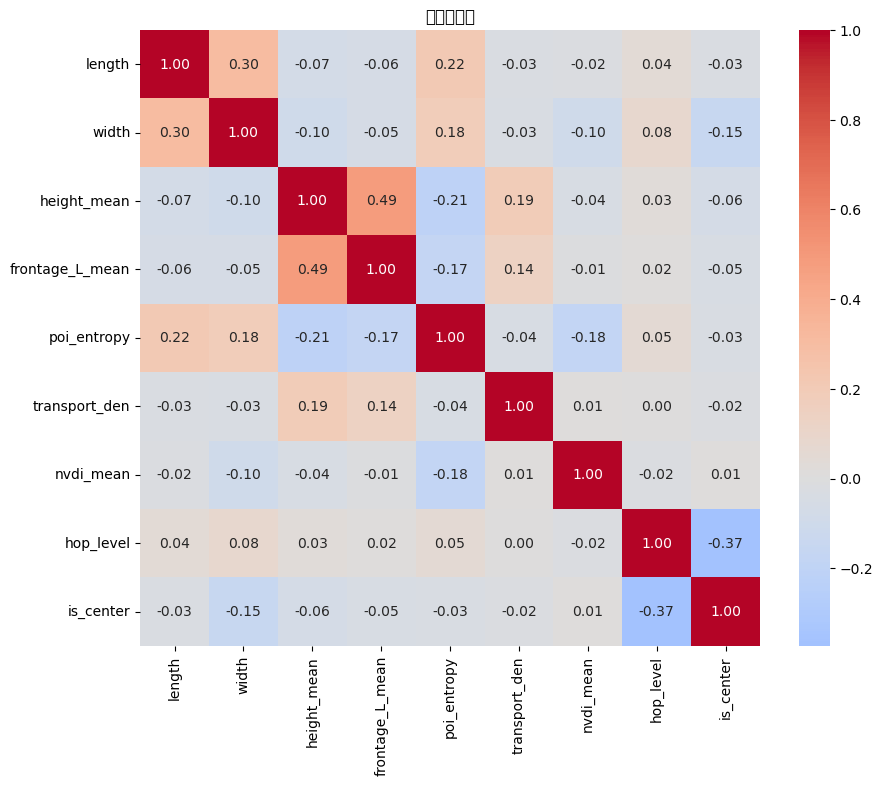

In [61]:
def quick_correlation():
    """快速相关性分析"""
    
    with open("models/data/route_graphs_filtered.pkl", 'rb') as f:
        graphs = pickle.load(f)
    
    # 收集数值特征
    data = {}
    numeric_features = [
        'length', 'width', 'height_mean', 'frontage_L_mean',
        'poi_entropy', 'transport_den', 'nvdi_mean', 'hop_level', 'is_center'
    ]
    
    for feat in numeric_features:
        data[feat] = []
    
    for g in graphs:
        for node, attrs in g['graph'].nodes(data=True):
            for feat in numeric_features:
                data[feat].append(attrs.get(feat, np.nan))
    
    # 计算相关性
    df = pd.DataFrame(data).dropna()
    corr = df.corr()
    
    # 显示相关性矩阵
    print("=== 特征相关性矩阵 ===")
    print(corr.round(3))
    
    # 简单热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('特征相关性')
    plt.show()

# 运行
quick_correlation()

### 可视化

In [39]:
def find_graphs_by_node_count(n, pkl_path="models/data/route_graphs.pkl"):
    """
    找出节点数为N的图的编号
    
    Args:
        n: 目标节点数
        pkl_path: 图数据文件路径
    
    Returns:
        list: 包含N个节点的图的索引列表
    """
    import pickle
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    indices = [i for i, graph in enumerate(route_graphs) 
              if graph['graph'].number_of_nodes() == n]
    
    print(f"节点数为 {n} 的图有 {len(indices)} 个:")
    for idx in indices:
        center_id = route_graphs[idx]['center_id']
        print(f"  图 {idx}: center_id={center_id}")
    
    return indices

graphs_with_n_nodes = find_graphs_by_node_count(50)


节点数为 50 的图有 6 个:
  图 1118: center_id=16804
  图 1122: center_id=16868
  图 1606: center_id=21846
  图 1609: center_id=21883
  图 1610: center_id=21885
  图 1611: center_id=21888


In [2]:
def visualize_ego_graph_by_index(
    graph_index,
    pkl_path="models/data/route_graphs.pkl",
    roads_path='data_for_test/meters_data/fixed_roads.shp',
    title_prefix="EGO",
    save_path=None,
    seed=0,
    buffer_radius=500,
    buildings_file="data_for_test/meters_data/building_meters.shp",
    # pois_file="data_for_test/meters_data/origin_poi_meters.shp"
):
    """
    通过图序号索引来可视化ego图
    
    参数:
        graph_index: 图的索引号 (0 to len(route_graphs)-1)
        pkl_path: route_graphs.pkl文件路径
        roads_path: 道路数据文件路径
        其他参数与原visualize_ego_graph()相同
    """
    import pickle
    import geopandas as gpd
    import numpy as np
    
    # 加载数据
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    roads = gpd.read_file(roads_path)
    if "rid" not in roads.columns:
        roads["rid"] = np.arange(len(roads))
    
    # 检查索引是否有效
    if graph_index < 0 or graph_index >= len(route_graphs):
        print(f"错误: 图索引 {graph_index} 超出范围 [0, {len(route_graphs)-1}]")
        return
    
    # 获取指定索引的ego图
    ego_graph = route_graphs[graph_index]
    center_id = ego_graph['center_id']
    
    print(f"正在可视化第 {graph_index} 号图 (center_id: {center_id})")
    print(f"节点数: {ego_graph['graph'].number_of_nodes()}")
    print(f"边数: {ego_graph['graph'].number_of_edges()}")
    
    # 调用原始的可视化函数
    visualize_ego_graph(
        ego_graph=ego_graph,
        all_roads=roads,
        title_prefix=f"{title_prefix}[{graph_index}]",
        save_path=save_path,
        seed=seed,
        buffer_radius=buffer_radius,
        buildings_file=buildings_file,
        # pois_file=pois_file
    )

def visualize_multiple_by_indices(
    graph_indices,
    pkl_path="models/data/route_graphs.pkl",
    roads_path='data_for_test/meters_data/fixed_roads.shp',
    out_dir="ego_graph_results",
    seed=0
):
    """
    批量可视化指定索引的多个ego图
    
    参数:
        graph_indices: 图索引列表，如 [24, 198, 888, 1007]
        其他参数同上
    """
    import os
    
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    for i, graph_index in enumerate(graph_indices):
        print(f"\n处理第 {i+1}/{len(graph_indices)} 个图...")
        
        if out_dir:
            save_path = f"{out_dir}/ego_{graph_index}.png"
        else:
            save_path = None
            
        visualize_ego_graph_by_index(
            graph_index=graph_index,
            pkl_path=pkl_path,
            roads_path=roads_path,
            save_path=save_path,
            seed=seed
        )



### 清除边缘图

In [51]:
# 检查是否是极小值而非严格的0
def check_near_zeros():
    with open("models/data/route_graphs_filtered.pkl", 'rb') as f:
        graphs = pickle.load(f)
    
    min_height = float('inf') 
    min_frontage = float('inf')
    
    for g in graphs:
        for node, attrs in g['graph'].nodes(data=True):
            if 'height_mean' in attrs:
                min_height = min(min_height, attrs['height_mean'])
            if 'frontage_L_mean' in attrs:
                min_frontage = min(min_frontage, attrs['frontage_L_mean'])
    
    print(f"height_mean最小值: {min_height}")
    print(f"frontage_L_mean最小值: {min_frontage}")

check_near_zeros()

height_mean最小值: 0.00033363741739252003
frontage_L_mean最小值: 0.00036144053550856336


正在可视化第 1122 号图 (center_id: 16868)
节点数: 50
边数: 51


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\

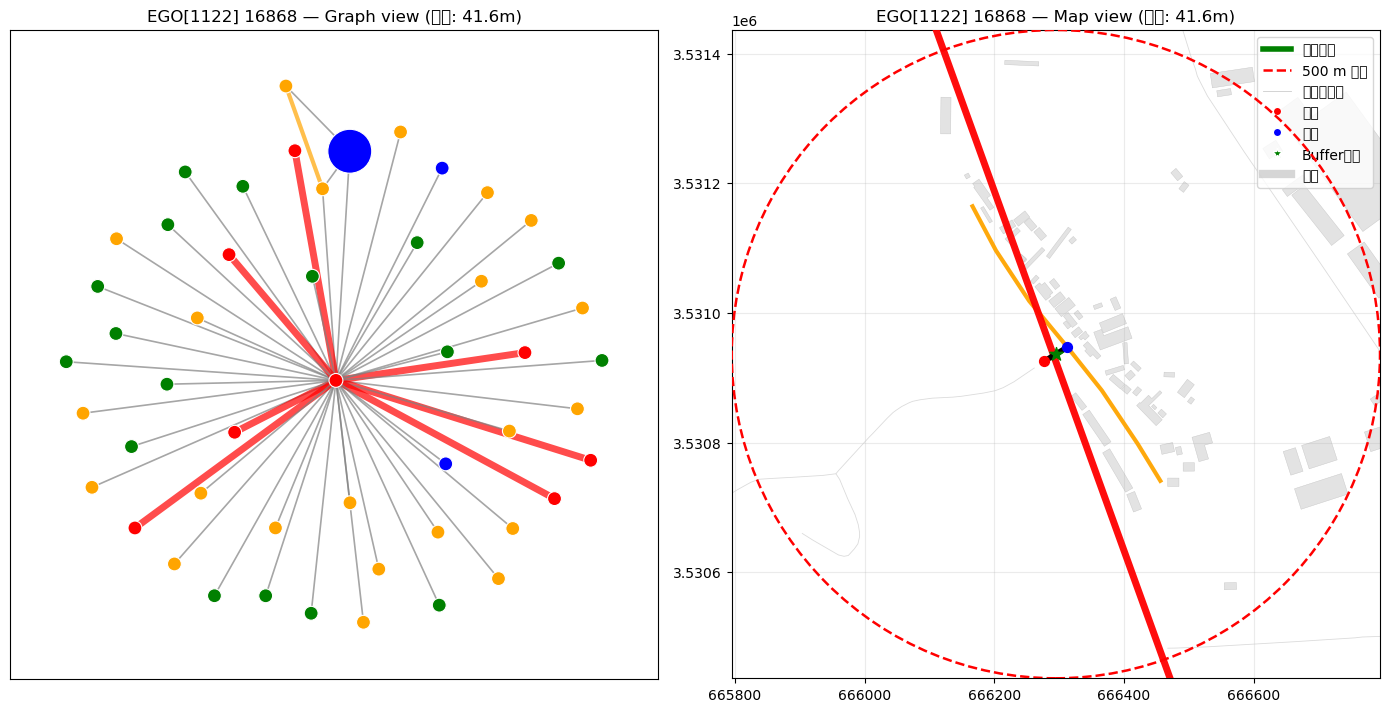

In [40]:
# 使用示例：

# 1. 可视化单个图 (比如第24号图)
visualize_ego_graph_by_index(1122)

In [ ]:


# 2. 可视化节点数最少的30个图 (2-3个节点)
small_graph_indices = [24, 198, 888, 1007, 1016, 1323, 1332, 1394, 1557, 1695, 
                      1696, 1816, 2054, 2124, 350, 365, 789, 872, 980, 982, 
                      1017, 1036, 1106, 1107, 1130, 1214, 1254, 1386, 1706, 1740]
visualize_multiple_by_indices(small_graph_indices, out_dir="small_ego_graphs")

# 3. 可视化节点数最多的30个图 (49-101个节点)
large_graph_indices = [1642, 976, 64, 1792, 1791, 164, 1188, 410, 709, 1176, 
                      1647, 346, 68, 384, 1601, 558, 1612, 108, 1605, 305, 
                      1607, 1032, 1611, 1610, 1609, 1606, 1122, 1118, 1636, 1613]
visualize_multiple_by_indices(large_graph_indices, out_dir="large_ego_graphs")


处理第 1/30 个图...
正在可视化第 24 号图 (center_id: 958)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 2/30 个图...
正在可视化第 198 号图 (center_id: 3372)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 3/30 个图...
正在可视化第 888 号图 (center_id: 15409)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 4/30 个图...
正在可视化第 1007 号图 (center_id: 16246)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 5/30 个图...
正在可视化第 1016 号图 (center_id: 16307)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 6/30 个图...
正在可视化第 1323 号图 (center_id: 18974)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 7/30 个图...
正在可视化第 1332 号图 (center_id: 19088)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 8/30 个图...
正在可视化第 1394 号图 (center_id: 19797)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 9/30 个图...
正在可视化第 1557 号图 (center_id: 21368)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 10/30 个图...
正在可视化第 1695 号图 (center_id: 22922)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 11/30 个图...
正在可视化第 1696 号图 (center_id: 22923)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 12/30 个图...
正在可视化第 1816 号图 (center_id: 25305)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 13/30 个图...
正在可视化第 2054 号图 (center_id: 35631)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 14/30 个图...
正在可视化第 2124 号图 (center_id: 40118)
节点数: 2
边数: 1


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 15/30 个图...
正在可视化第 350 号图 (center_id: 5514)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 16/30 个图...
正在可视化第 365 号图 (center_id: 5687)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 17/30 个图...
正在可视化第 789 号图 (center_id: 9872)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 18/30 个图...
正在可视化第 872 号图 (center_id: 14058)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 19/30 个图...
正在可视化第 980 号图 (center_id: 16095)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 20/30 个图...
正在可视化第 982 号图 (center_id: 16098)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 21/30 个图...
正在可视化第 1017 号图 (center_id: 16317)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 22/30 个图...
正在可视化第 1036 号图 (center_id: 16381)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 23/30 个图...
正在可视化第 1106 号图 (center_id: 16684)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 24/30 个图...
正在可视化第 1107 号图 (center_id: 16685)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 25/30 个图...
正在可视化第 1130 号图 (center_id: 16908)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 26/30 个图...
正在可视化第 1214 号图 (center_id: 17879)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 27/30 个图...
正在可视化第 1254 号图 (center_id: 18287)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 28/30 个图...
正在可视化第 1386 号图 (center_id: 19640)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 29/30 个图...
正在可视化第 1706 号图 (center_id: 23003)
节点数: 3
边数: 2


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 30/30 个图...
正在可视化第 1740 号图 (center_id: 23320)
节点数: 3
边数: 3


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 1/30 个图...
正在可视化第 1642 号图 (center_id: 22336)
节点数: 101
边数: 103


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 2/30 个图...
正在可视化第 976 号图 (center_id: 16083)
节点数: 100
边数: 104


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 3/30 个图...
正在可视化第 64 号图 (center_id: 1752)
节点数: 94
边数: 102


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 4/30 个图...
正在可视化第 1792 号图 (center_id: 23882)
节点数: 91
边数: 103


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 5/30 个图...
正在可视化第 1791 号图 (center_id: 23881)
节点数: 87
边数: 95


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 6/30 个图...
正在可视化第 164 号图 (center_id: 2959)
节点数: 73
边数: 85


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 7/30 个图...
正在可视化第 1188 号图 (center_id: 17657)
节点数: 66
边数: 78


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 8/30 个图...
正在可视化第 410 号图 (center_id: 7137)
节点数: 65
边数: 75


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 9/30 个图...
正在可视化第 709 号图 (center_id: 9258)
节点数: 63
边数: 64


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 10/30 个图...
正在可视化第 1176 号图 (center_id: 17500)
节点数: 61
边数: 74


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 11/30 个图...
正在可视化第 1647 号图 (center_id: 22471)
节点数: 60
边数: 63


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 12/30 个图...
正在可视化第 346 号图 (center_id: 5438)
节点数: 59
边数: 66


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 13/30 个图...
正在可视化第 68 号图 (center_id: 1770)
节点数: 59
边数: 64


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 14/30 个图...
正在可视化第 384 号图 (center_id: 6181)
节点数: 56
边数: 59


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 15/30 个图...
正在可视化第 1601 号图 (center_id: 21825)
节点数: 55
边数: 61


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 16/30 个图...
正在可视化第 558 号图 (center_id: 8305)
节点数: 55
边数: 56


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 17/30 个图...
正在可视化第 1612 号图 (center_id: 21908)
节点数: 53
边数: 58


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 18/30 个图...
正在可视化第 108 号图 (center_id: 2262)
节点数: 53
边数: 65


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 19/30 个图...
正在可视化第 1605 号图 (center_id: 21845)
节点数: 52
边数: 55


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 20/30 个图...
正在可视化第 305 号图 (center_id: 5041)
节点数: 52
边数: 60


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 21/30 个图...
正在可视化第 1607 号图 (center_id: 21872)
节点数: 51
边数: 55


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 22/30 个图...
正在可视化第 1032 号图 (center_id: 16361)
节点数: 51
边数: 53


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 23/30 个图...
正在可视化第 1611 号图 (center_id: 21888)
节点数: 50
边数: 55


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 24/30 个图...
正在可视化第 1610 号图 (center_id: 21885)
节点数: 50
边数: 57


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 25/30 个图...
正在可视化第 1609 号图 (center_id: 21883)
节点数: 50
边数: 55


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203


处理第 26/30 个图...
正在可视化第 1606 号图 (center_id: 21846)
节点数: 50
边数: 55


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 27/30 个图...
正在可视化第 1122 号图 (center_id: 16868)
节点数: 50
边数: 51


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 28/30 个图...
正在可视化第 1118 号图 (center_id: 16804)
节点数: 50
边数: 49


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 29/30 个图...
正在可视化第 1636 号图 (center_id: 22301)
节点数: 49
边数: 53


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\


处理第 30/30 个图...
正在可视化第 1613 号图 (center_id: 21911)
节点数: 49
边数: 56


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Local\Temp\ipykernel_30676\1494292875.py:203: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
C:\Users\

=== Length字段分析 ===
样本数量: 30653
数值范围: [2.22, 65212.11]
平均值: 458.40
中位数: 163.41
标准差: 2381.88

=== 数值分布 ===
< 10的: 1351 个 (4.4%)
10-100的: 10159 个 (33.1%)
100-1000的: 17538 个 (57.2%)
>= 1000的: 1605 个 (5.2%)

=== 单位判断 ===
✓ 数值范围合理，很可能是米(m)单位
  - 平均道路长度在几十到几百米之间

=== 样本值 ===
样本1: 335.68
样本2: 120.02
样本3: 514.45
样本4: 185.14
样本5: 246.27
